In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import lmpsetup
import hmdsetup

import lmp
import hmd

import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import analysis

import scipy.constants as cnt

import shutil
import os
from scipy import ndimage
import mdtraj as md
import statsmodels.tsa.stattools
import MDAnalysis.analysis as mda
import scipy
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D
import matplotlib.image as mpimg


from style_vars import *
plt.style.use('default')
plt.style.use('style.mplstyle')

hps_lines = [Line2D([0], [0], color='black', ls='--'),
                Line2D([0], [0], color='black')]

wt_d4_lines = [Line2D([0], [0], color=C_W),
                Line2D([0], [0], color=C_4)]

### Rgs

In [2]:
# 1.0
wt_1_n = lmp.LMP(md_dir='/home/adria/data/real_final/HPS/1.0/WT', low_mem=True)
wt_1_n.rg()
d4_1_n = lmp.LMP(md_dir='/home/adria/data/real_final/HPS/1.0/D4', low_mem=True)
d4_1_n.rg()
d7_1_n = lmp.LMP(md_dir='/home/adria/data/real_final/HPS/1.0/7D_WT', low_mem=True)
d7_1_n.rg()
d12_1_n = lmp.LMP(md_dir='/home/adria/data/real_final/HPS/1.0/12D_D4', low_mem=True)
d12_1_n.rg()

> Run Completed at 100.00% for CPEB4_alpha. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every 10 for a total of [10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001] to avoid strong correlations
> Run Completed at 100.00% for CPEB4_D4. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every 10 for a total of [10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001] to avoid strong correlations
> Run Completed at 100.00% for 7D_CPEB4. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every 10 for a total of [10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001] to avoid strong correlations
> Run Completed at 100.00% for 12D_CPEB4_D4. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every 10 for a total of [10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001] to avoid strong correlations


(array([], dtype=float64), array([], dtype=float64))

In [3]:
# 1.0
wt_1 = lmp.LMP(md_dir='/home/adria/data/real_final/HPS-T/1.0/WT', low_mem=True)
wt_1.rg()
d4_1 = lmp.LMP(md_dir='/home/adria/data/real_final/HPS-T/1.0/D4', low_mem=True)
d4_1.rg()
d7_1 = lmp.LMP(md_dir='/home/adria/data/real_final/HPS-T/1.0/7D_WT', low_mem=True)
d7_1.rg()
d12_1 = lmp.LMP(md_dir='/home/adria/data/real_final/HPS-T/1.0/12D_D4', low_mem=True)
d12_1.rg()

> Run Completed at 100.00% for CPEB4_alpha. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every 10 for a total of [10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001] to avoid strong correlations
> Run Completed at 100.00% for CPEB4_D4. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every 10 for a total of [10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001] to avoid strong correlations
> Run Completed at 100.00% for 7D_CPEB4. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every 10 for a total of [10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001] to avoid strong correlations
> Run Completed at 100.00% for 12D_CPEB4_D4. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every 10 for a total of [10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001] to avoid strong correlations


(array([], dtype=float64), array([], dtype=float64))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(490, 550, '370 $\\mathrm{\\AA}$')

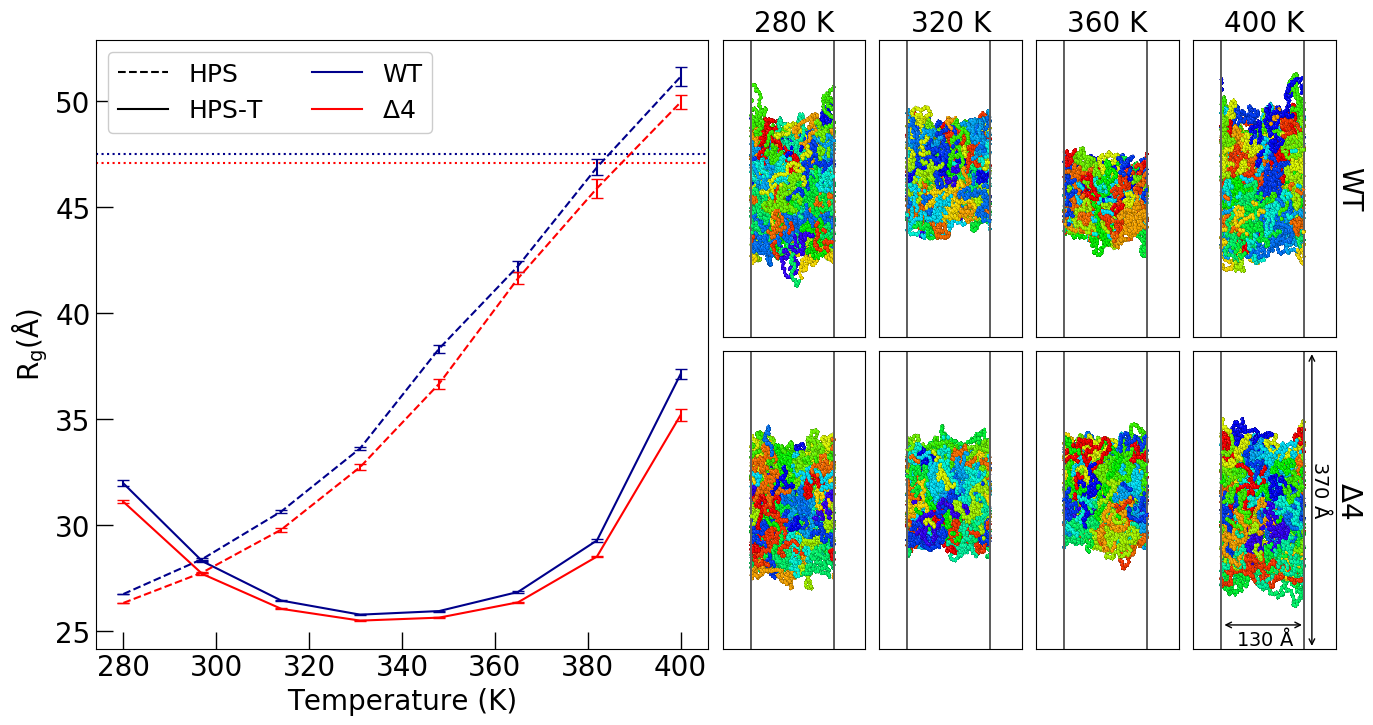

In [93]:
fig = plt.figure(figsize=(16, 16))

grid = plt.GridSpec(8, 8, wspace=0.1, hspace=0.1)
ax1 = plt.subplot(grid[:4, :4])
# fig.patch.set_facecolor('#E0E0E0')

ax1.errorbar(wt_1.temperatures, wt_1.c_rg[0], yerr=wt_1.c_rg[1], color=C_W, label=L_W)
ax1.errorbar(d4_1.temperatures, d4_1.c_rg[0], yerr=d4_1.c_rg[1], color=C_4, label=L_4)
ax1.errorbar(wt_1_n.temperatures, wt_1_n.c_rg[0], yerr=wt_1_n.c_rg[1], color=C_W, ls='--')
ax1.errorbar(d4_1_n.temperatures, d4_1_n.c_rg[0], yerr=d4_1_n.c_rg[1], color=C_4, ls='--')
ax1.axhline(wt_1.rw_rg(), ls='dotted', color=C_W)
ax1.axhline(d4_1.rw_rg(), ls='dotted', color=C_4)

ax1.legend([Line2D([0], [0], color='black', ls='--'), Line2D([0], [0], color='black'),
           Line2D([0], [0], color=C_W),
           Line2D([0], [0], color=C_4),], ["HPS", "HPS-T", L_W, L_4]
           , loc='upper left', ncol=2)
ax1.set_xlabel("Temperature (K)")
ax1.set_ylabel("$\mathrm{R_g (\AA)}$")

ts = [280,320,360,400]
for i in range(4):
#     img = mpimg.imread(f'/home/adria/Figures/HMD/HPS-T/1.0/wt_{ts[i]:.0f}.png')
    img = mpimg.imread(f'/home/adria/Figures/HMD/HPS-T/1.0/wt_{ts[i]:.0f}.png')
    rimg = ndimage.rotate(img,0)
    ax = plt.subplot(grid[0:2, i+4], xticklabels=[], yticklabels=[], xticks=[], yticks=[])
    ax.set_title(f"{ts[i]} K", fontsize=20)
#     ax.axis('off')
    ax.imshow(rimg, aspect='auto')

ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.set_ylabel(L_W, rotation=-90, labelpad=20)
        
for i in range(4):
#     img = mpimg.imread(f'/home/adria/Figures/HMD/HPS-T/1.0/d4_{ts[i]:.0f}.png')
    img = mpimg.imread(f'/home/adria/Figures/HMD/HPS-T/1.0/d4_{ts[i]:.0f}.png')
    rimg = ndimage.rotate(img,0)
    ax = plt.subplot(grid[2:4, i+4], xticklabels=[], yticklabels=[], xticks=[], yticks=[])
#     ax = plt.subplot(grid[2:4, i+4])
#     ax.axis('off')
    ax.axes.get_yaxis().set_visible(False)
    ax.imshow(rimg, aspect='auto')

ax.axes.get_yaxis().set_visible(True)
ax.yaxis.set_label_position("right")
ax.set_ylabel(L_4, rotation=-90, labelpad=20)

# ax.plot([135,450],[920,920], ls='-', color='black', lw=3)
ax.annotate(s='', xy=(120,920), xytext=(470,920), arrowprops=dict(arrowstyle='<->'))
ax.annotate(s='', xy=(500,0), xytext=(500,1000), arrowprops=dict(arrowstyle='<->'))

ax.annotate(s='130 $\mathrm{\AA}$', xy=(180,988), fontsize=14)
ax.annotate(s='370 $\mathrm{\AA}$', xy=(490,550), fontsize=14, rotation=-90)

In [4]:
# 0.8
wt_8 = lmp.LMP(md_dir='/home/adria/data/real_final/HPS-T/0.8/WT', low_mem=True)
wt_8.rg()
d4_8 = lmp.LMP(md_dir='/home/adria/data/real_final/HPS-T/0.8/D4', low_mem=True)
d4_8.rg()
d7_8 = lmp.LMP(md_dir='/home/adria/data/real_final/HPS-T/0.8/7D_WT', low_mem=True)
d7_8.rg()
d12_8 = lmp.LMP(md_dir='/home/adria/data/real_final/HPS-T/0.8/12D_D4', low_mem=True)
d12_8.rg()

> Run Completed at 100.00% for CPEB4_alpha. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every 10 for a total of [10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001] to avoid strong correlations
> Run Completed at 100.00% for CPEB4_D4. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every 10 for a total of [10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001] to avoid strong correlations
> Run Completed at 100.00% for 7D_CPEB4. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every 10 for a total of [10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001] to avoid strong correlations
> Run Completed at 100.00% for 12D_CPEB4_D4. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every 10 for a total of [10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001] to avoid strong correlations


(array([], dtype=float64), array([], dtype=float64))

In [5]:
# 0.75
wt_75 = lmp.LMP(md_dir='/home/adria/data/real_final/HPS-T/0.75/WT', low_mem=True)
wt_75.rg(save='WT_075.txt')
d4_75 = lmp.LMP(md_dir='/home/adria/data/real_final/HPS-T/0.75/D4', low_mem=True)
d4_75.rg(save='D4_075.txt')
d7_75 = lmp.LMP(md_dir='/home/adria/data/real_final/HPS-T/0.75/7D_WT', low_mem=True)
d7_75.rg(save='7D_075.txt')
d12_75 = lmp.LMP(md_dir='/home/adria/data/real_final/HPS-T/0.75/12D_D4', low_mem=True)
d12_75.rg(save='12D_075.txt')

> Run Completed at 100.00% for CPEB4_alpha. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every 10 for a total of [10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001] to avoid strong correlations
> Run Completed at 100.00% for CPEB4_D4. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every 10 for a total of [10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001] to avoid strong correlations
> Run Completed at 100.00% for 7D_CPEB4. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every 10 for a total of [10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001] to avoid strong correlations
> Run Completed at 100.00% for 12D_CPEB4_D4. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every 10 for a total of [10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001] to avoid strong correlations


(array([], dtype=float64), array([], dtype=float64))

In [6]:
# 0.7
wt_7 = lmp.LMP(md_dir='/home/adria/data/real_final/HPS-T/0.7/WT', low_mem=True)
wt_7.rg()
d4_7 = lmp.LMP(md_dir='/home/adria/data/real_final/HPS-T/0.7/D4', low_mem=True)
d4_7.rg()
d7_7 = lmp.LMP(md_dir='/home/adria/data/real_final/HPS-T/0.7/7D_WT', low_mem=True)
d7_7.rg()
d12_7 = lmp.LMP(md_dir='/home/adria/data/real_final/HPS-T/0.7/12D_D4', low_mem=True)
d12_7.rg()

> Run Completed at 50.63% for CPEB4_alpha. Ran 506350000 steps for a total of 50636 frames 
> Taking frames every 10 for a total of [6342, 5874, 5129, 5066, 5193, 5587, 5868, 6421] to avoid strong correlations
> Run Completed at 49.40% for CPEB4_D4. Ran 493990000 steps for a total of 49400 frames 
> Taking frames every 10 for a total of [6770, 6211, 5598, 5765, 5547, 5851, 6233, 4940] to avoid strong correlations
> Run Completed at 100.00% for 7D_CPEB4. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every 10 for a total of [10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001] to avoid strong correlations
> Run Completed at 100.00% for 12D_CPEB4_D4. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every 10 for a total of [10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001] to avoid strong correlations


(array([], dtype=float64), array([], dtype=float64))

In [7]:
# 0.6
wt_6 = lmp.LMP(md_dir='/home/adria/data/real_final/HPS-T/0.6/WT', low_mem=True)
wt_6.rg()
d4_6 = lmp.LMP(md_dir='/home/adria/data/real_final/HPS-T/0.6/D4', low_mem=True)
d4_6.rg()
d7_6 = lmp.LMP(md_dir='/home/adria/data/real_final/HPS-T/0.6/7D_WT', low_mem=True)
d7_6.rg()
d12_6 = lmp.LMP(md_dir='/home/adria/data/real_final/HPS-T/0.6/12D_D4', low_mem=True)
d12_6.rg()

> Run Completed at 100.00% for CPEB4_alpha. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every 10 for a total of [10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001] to avoid strong correlations
> Run Completed at 100.00% for CPEB4_D4. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every 10 for a total of [10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001] to avoid strong correlations
> Run Completed at 100.00% for 7D_CPEB4. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every 10 for a total of [10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001] to avoid strong correlations
> Run Completed at 100.00% for 12D_CPEB4_D4. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every 10 for a total of [10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001] to avoid strong correlations


(array([], dtype=float64), array([], dtype=float64))

### PHOSPHOS

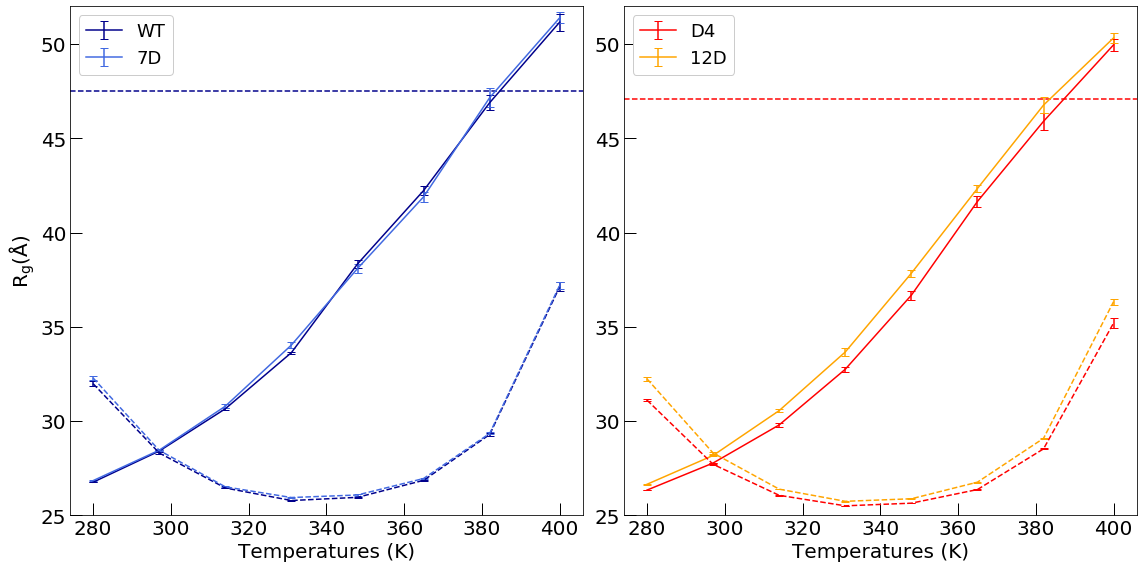

In [20]:
fig, axs = plt.subplots(1,2, figsize=(16,8))
axs[0].errorbar(wt_1_n.temperatures, wt_1_n.c_rg[0], yerr=wt_1_n.c_rg[1], color=C_W, label='WT')
axs[0].errorbar(d7_1_n.temperatures, d7_1_n.c_rg[0], yerr=d7_1_n.c_rg[1], color=C_7, label='7D')
axs[0].errorbar(wt_1.temperatures, wt_1.c_rg[0], yerr=wt_1.c_rg[1], color=C_W, ls='--')
axs[0].errorbar(d7_1.temperatures, d7_1.c_rg[0], yerr=d7_1.c_rg[1], color=C_7, ls='--')
axs[0].legend(loc='upper left')
axs[0].axhline(wt_1.rw_rg(), color=C_W, ls='--')
axs[0].set_ylim(25,52)

axs[0].set_ylabel("$\mathrm{R_g (\AA)}$")
axs[0].set_xlabel("Temperatures (K)")

axs[1].errorbar(d4_1_n.temperatures, d4_1_n.c_rg[0], yerr=d4_1_n.c_rg[1], color=C_4, label='D4')
axs[1].errorbar(d12_1_n.temperatures, d12_1_n.c_rg[0], yerr=d12_1_n.c_rg[1], color=C_12, label='12D')
axs[1].errorbar(d4_1.temperatures, d4_1.c_rg[0], yerr=d4_1.c_rg[1], color=C_4, ls='--')
axs[1].errorbar(d12_1.temperatures, d12_1.c_rg[0], yerr=d12_1.c_rg[1], color=C_12, ls='--')
axs[1].legend(loc='upper left')
axs[1].set_xlabel("Temperatures (K)")
axs[1].axhline(d4_1.rw_rg(), color=C_4, ls='--')
axs[1].set_ylim(25,52)
fig.tight_layout()

(8,) (8,) (8,)


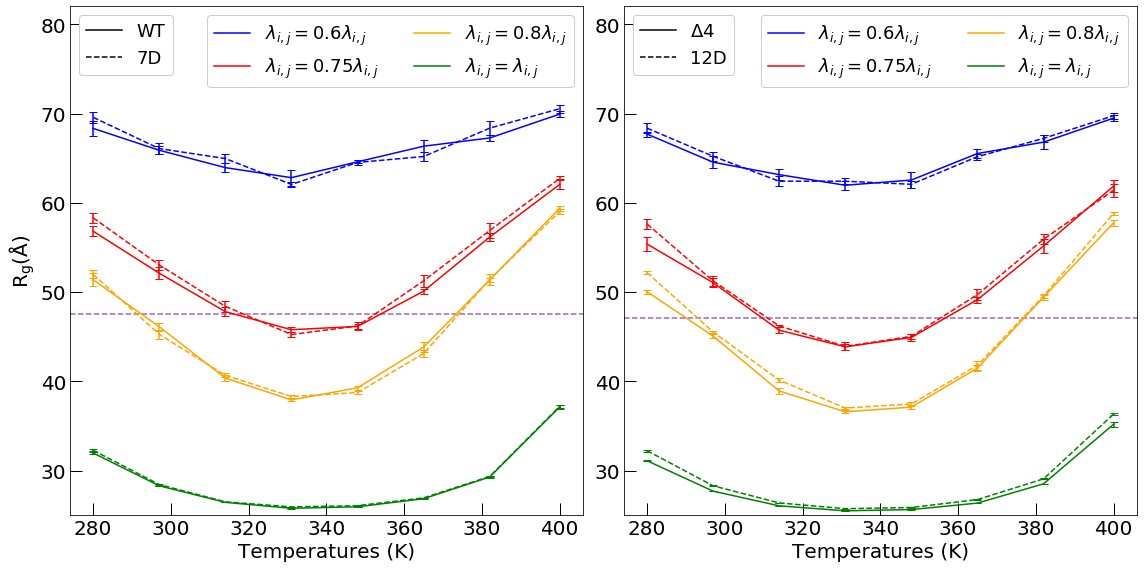

In [29]:
print(d7_7.temperatures.shape, d7_7.c_rg[0].shape, d7_7.c_rg[1].shape)

cs = ['green', 'orange', 'red', 'blue', 'purple']
fig, axs = plt.subplots(1,2, figsize=(16,8))
axs[0].errorbar(wt_1.temperatures, wt_1.c_rg[0], yerr=wt_1.c_rg[1], color=cs[0], label='1')
axs[0].errorbar(d7_1.temperatures, d7_1.c_rg[0], yerr=d7_1.c_rg[1], color=cs[0], ls='--', label='7D')
axs[0].errorbar(wt_8.temperatures, wt_8.c_rg[0], yerr=wt_8.c_rg[1], color=cs[1], )
axs[0].errorbar(d7_8.temperatures, d7_8.c_rg[0], yerr=d7_8.c_rg[1], color=cs[1], ls='--')
axs[0].errorbar(wt_75.temperatures, wt_75.c_rg[0], yerr=wt_75.c_rg[1], color=cs[2], )
axs[0].errorbar(d7_75.temperatures, d7_75.c_rg[0], yerr=d7_75.c_rg[1], color=cs[2], ls='--')
# axs[0].errorbar(wt_7.temperatures, wt_7.c_rg[0], yerr=wt_7.c_rg[1], color=C_W, ls='--')
# axs[0].errorbar(d7_7.temperatures, d7_7.c_rg[0], yerr=d7_7.c_rg[1], color=C_7, ls='--')
axs[0].errorbar(wt_6.temperatures, wt_6.c_rg[0], yerr=wt_6.c_rg[1], color=cs[3], )
axs[0].errorbar(d7_6.temperatures, d7_6.c_rg[0], yerr=d7_6.c_rg[1], color=cs[3], ls='--')
# axs[0].legend(loc='upper left')
axs[0].set_ylabel("$\mathrm{R_g (\AA)}$")
axs[0].set_xlabel("Temperatures (K)")
axs[0].set_ylim(25,82)
leg2 = axs[0].legend([Line2D([0], [0], color='black'),Line2D([0], [0], ls='--', color='black')],(['WT', '7D']), loc='upper left')
axs[0].add_artist(leg2)
full_lines = [Line2D([0], [0], color=x) for x in cs[:-1]]
axs[0].axhline(wt_1.rw_rg(), ls='--', color='tab:purple')
axs[0].legend(np.flip(full_lines), np.flip(['$\lambda_{i,j}=\lambda_{i,j}$', '$\lambda_{i,j}=0.8\lambda_{i,j}$', '$\lambda_{i,j}=0.75\lambda_{i,j}$', '$\lambda_{i,j}=0.6\lambda_{i,j}$']), ncol=2)

axs[1].errorbar(d4_1.temperatures, d4_1.c_rg[0], yerr=d4_1.c_rg[1], color=cs[0],  label='D4')
axs[1].errorbar(d12_1.temperatures, d12_1.c_rg[0], yerr=d12_1.c_rg[1], color=cs[0], ls='--', label='12D')
axs[1].errorbar(d4_8.temperatures, d4_8.c_rg[0], yerr=d4_8.c_rg[1], color=cs[1], )
axs[1].errorbar(d12_8.temperatures, d12_8.c_rg[0], yerr=d12_8.c_rg[1], color=cs[1], ls='--')
axs[1].errorbar(d4_75.temperatures, d4_75.c_rg[0], yerr=d4_75.c_rg[1], color=cs[2])
axs[1].errorbar(d12_75.temperatures, d12_75.c_rg[0], yerr=d12_75.c_rg[1], color=cs[2], ls='--')
# axs[1].errorbar(d4_7.temperatures, d4_7.c_rg[0], yerr=d4_7.c_rg[1], color=C_W, ls='--')
# axs[1].errorbar(d12_7.temperatures, d12_7.c_rg[0], yerr=d12_7.c_rg[1], color=C_7, ls='--')
axs[1].errorbar(d4_6.temperatures, d4_6.c_rg[0], yerr=d4_6.c_rg[1], color=cs[3])
axs[1].errorbar(d12_6.temperatures, d12_6.c_rg[0], yerr=d12_6.c_rg[1], color=cs[3], ls='--')
axs[1].legend(loc='upper left')
axs[1].set_ylim(25,82)
axs[1].set_xlabel("Temperatures (K)")

leg2 = axs[1].legend([Line2D([0], [0], color='black'),Line2D([0], [0], ls='--', color='black')],(['$\Delta$4', '12D']), loc='upper left')
axs[1].add_artist(leg2)
full_lines = [Line2D([0], [0], color=x) for x in cs[:-1]]
axs[1].legend(np.flip(full_lines), np.flip(['$\lambda_{i,j}=\lambda_{i,j}$', '$\lambda_{i,j}=0.8\lambda_{i,j}$', '$\lambda_{i,j}=0.75\lambda_{i,j}$', '$\lambda_{i,j}=0.6\lambda_{i,j}$']), ncol=2)
axs[1].axhline(d4_1.rw_rg(), ls='--', color='tab:purple')
fig.tight_layout()

# axs[1].errorbar(d4_1_n.temperatures, d4_1_n.c_rg[0], yerr=d4_1_n.c_rg[1], color=C_4, label='D4')
# axs[1].errorbar(d12_1_n.temperatures, d12_1_n.c_rg[0], yerr=d12_1_n.c_rg[1], color=C_12, label='12D')
# axs[1].errorbar(d4_1.temperatures, d4_1.c_rg[0], yerr=d4_1.c_rg[1], color=C_4, ls='--')
# axs[1].errorbar(d12_1.temperatures, d12_1.c_rg[0], yerr=d12_1.c_rg[1], color=C_12, ls='--')
# axs[1].legend(loc='upper left')
# axs[1].set_xlabel("Temperatures (K)")
# fig.tight_layout()

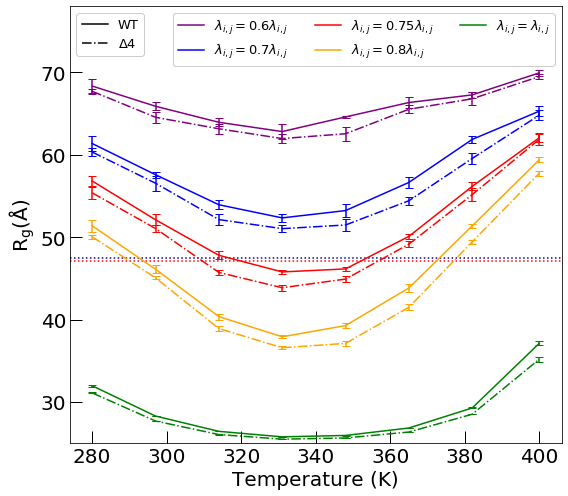

In [15]:
plt.figure(figsize=(8,7))
ccc = plt.get_cmap('Greens')
# cs = [ccc(x) for x in np.linspace(0.4,0.9,5)]
cs = ['green', 'orange', 'red', 'blue', 'purple']

plt.errorbar(wt_1.temperatures, wt_1.c_rg[0], yerr=wt_1.c_rg[1], color=cs[0])
plt.errorbar(d4_1.temperatures, d4_1.c_rg[0], yerr=d4_1.c_rg[1], color=cs[0], ls='dashdot')
plt.errorbar(wt_8.temperatures, wt_8.c_rg[0], yerr=wt_8.c_rg[1], color=cs[1])
plt.errorbar(d4_8.temperatures, d4_8.c_rg[0], yerr=d4_8.c_rg[1], color=cs[1], ls='dashdot')
plt.errorbar(wt_7.temperatures, wt_7.c_rg[0], yerr=wt_7.c_rg[1], color=cs[3])
plt.errorbar(d4_7.temperatures, d4_7.c_rg[0], yerr=d4_7.c_rg[1], color=cs[3], ls='dashdot')
plt.errorbar(wt_75.temperatures, wt_75.c_rg[0], yerr=wt_75.c_rg[1], color=cs[2])
plt.errorbar(d4_75.temperatures, d4_75.c_rg[0], yerr=d4_75.c_rg[1], color=cs[2], ls='dashdot')
plt.errorbar(wt_6.temperatures, wt_6.c_rg[0], yerr=wt_6.c_rg[1], color=cs[4])
plt.errorbar(d4_6.temperatures, d4_6.c_rg[0], yerr=d4_6.c_rg[1], color=cs[4], ls='dashdot')
plt.axhline(wt_1.rw_rg(),ls='dotted', color=C_W)
plt.axhline(d4_1.rw_rg(),ls='dotted', color=C_4)

wt_d4_lines = [Line2D([0], [0], color="black", ),
                Line2D([0], [0], color="black", ls='dashdot')]

full_lines = [Line2D([0], [0], color=x) for x in cs]

leg1 = plt.legend(wt_d4_lines,([L_W, L_4]), loc='upper left', fontsize=13)

plt.xlabel("Temperature (K)")
plt.ylabel("$\mathrm{R_g(\AA)}$")
plt.ylim(25, 78)
plt.gca().add_artist(leg1)
plt.legend(np.flip(full_lines), np.flip(['$\lambda_{i,j}=\lambda_{i,j}$', '$\lambda_{i,j}=0.8\lambda_{i,j}$', '$\lambda_{i,j}=0.75\lambda_{i,j}$', '$\lambda_{i,j}=0.7\lambda_{i,j}$', '$\lambda_{i,j}=0.6\lambda_{i,j}$']), ncol=3, fontsize=13)
plt.tight_layout()

In [2]:
plt.figure(figsize=(16,12))
ccc = plt.get_cmap('Greens')
cs = ['green', 'orange', 'red', 'blue', 'purple']
plt.errorbar(wt_1.temperatures, wt_1.c_rg[0], yerr=wt_1.c_rg[1], color=cs[0], markersize=4)
plt.errorbar(d4_1.temperatures, d4_1.c_rg[0], yerr=d4_1.c_rg[1], color=cs[0], ls='--')
plt.errorbar(wt_8.temperatures, wt_8.c_rg[0], yerr=wt_8.c_rg[1], color=cs[1], markersize=4)
plt.errorbar(d4_8.temperatures, d4_8.c_rg[0], yerr=d4_8.c_rg[1], color=cs[1], ls='--')
plt.errorbar(wt_7.temperatures, wt_7.c_rg[0], yerr=wt_7.c_rg[1], color=cs[3], markersize=4)
plt.errorbar(d4_7.temperatures, d4_7.c_rg[0], yerr=d4_7.c_rg[1], color=cs[3], ls='--')
plt.errorbar(wt_75.temperatures, wt_75.c_rg[0], yerr=wt_75.c_rg[1], color=cs[2], markersize=4)
plt.errorbar(d4_75.temperatures, d4_75.c_rg[0], yerr=d4_75.c_rg[1], color=cs[2], ls='--')
plt.errorbar(wt_6.temperatures, wt_6.c_rg[0], yerr=wt_6.c_rg[1], color=cs[4], markersize=4)
plt.errorbar(d4_6.temperatures, d4_6.c_rg[0], yerr=d4_6.c_rg[1], color=cs[4], ls='--')
plt.axhline(wt_1.rw_rg(),ls='dotted', color=C_W)
plt.axhline(d4_1.rw_rg(),ls='dotted', color=C_4)

wt_d4_lines = [Line2D([0], [0], color="black", markersize=4),
                Line2D([0], [0], color="black", ls='--')]

full_lines = [Line2D([0], [0], color=x) for x in cs]

leg1 = plt.legend(wt_d4_lines,(['WT', '$\Delta4$']), loc='upper left')

plt.xlabel("Temperature (K)")
plt.ylabel("$R_g(\AA)$")

plt.gca().add_artist(leg1)
plt.legend(np.flip(full_lines), np.flip(['$\lambda_{i,j}=\lambda_{i,j}$', '$\lambda_{i,j}=0.8\lambda_{i,j}$', '$\lambda_{i,j}=0.75\lambda_{i,j}$', '$\lambda_{i,j}=0.7\lambda_{i,j}$', '$\lambda_{i,j}=0.6\lambda_{i,j}$']))

NameError: name 'plt' is not defined

ValueError: shape mismatch: objects cannot be broadcast to a single shape

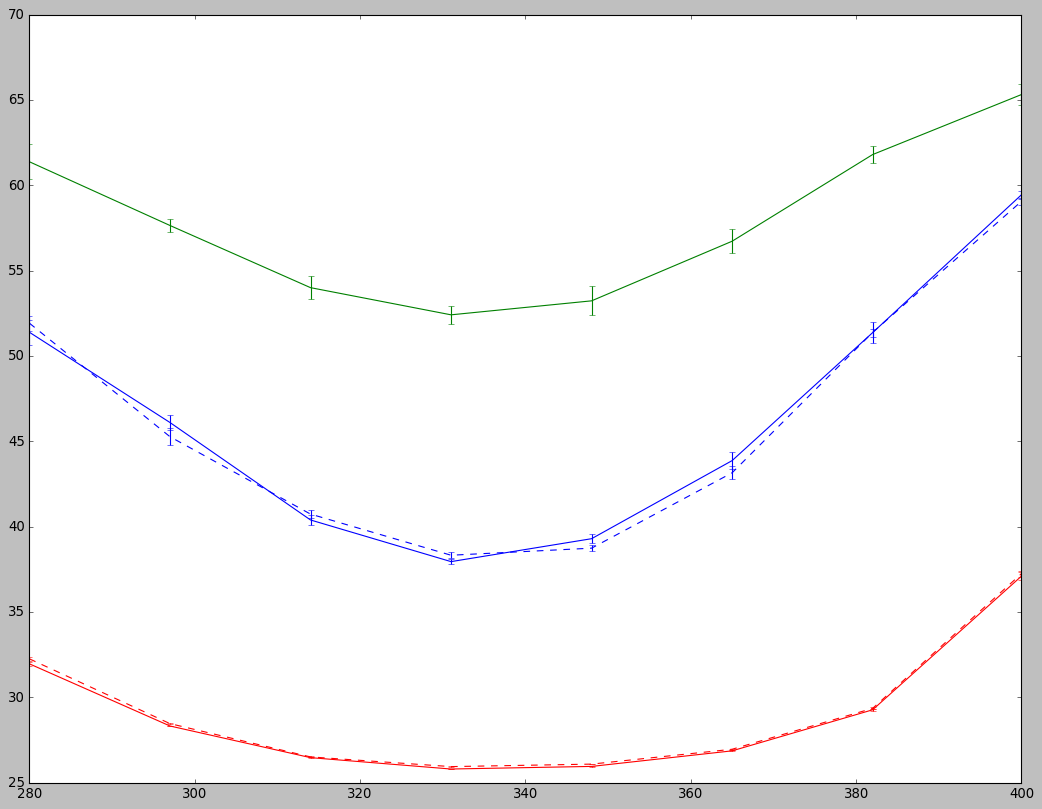

In [10]:
plt.figure(figsize=(16,12))
plt.errorbar(wt_1.temperatures, wt_1.c_rg[0], yerr=wt_1.c_rg[1], label='1 WT', color='red')
plt.errorbar(d7_1.temperatures, d7_1.c_rg[0], yerr=d7_1.c_rg[1], label='1 d7', color='red', ls='--')
plt.errorbar(wt_8.temperatures, wt_8.c_rg[0], yerr=wt_8.c_rg[1], label='0.8 WT', color='blue')
plt.errorbar(d7_8.temperatures, d7_8.c_rg[0], yerr=d7_8.c_rg[1], label='0.8 d7', color='blue', ls='--')
plt.errorbar(wt_7.temperatures, wt_7.c_rg[0], yerr=wt_7.c_rg[1], label='0.7 WT', color='green')
plt.errorbar(d7_7.temperatures, d7_7.c_rg[0], yerr=d7_7.c_rg[1], label='0.7 d7', color='green', ls='--')
plt.errorbar(wt_75.temperatures, wt_75.c_rg[0], yerr=wt_75.c_rg[1], label='0.75 WT', color='orange')
plt.errorbar(d7_75.temperatures, d7_75.c_rg[0], yerr=d7_75.c_rg[1], label='0.75 d7', color='orange', ls='--')
plt.errorbar(wt_6.temperatures, wt_6.c_rg[0], yerr=wt_6.c_rg[1], label='0.6 WT', color='purple')
plt.errorbar(d7_6.temperatures, d7_6.c_rg[0], yerr=d7_6.c_rg[1], label='0.6 d7', color='purple', ls='--')
plt.legend()

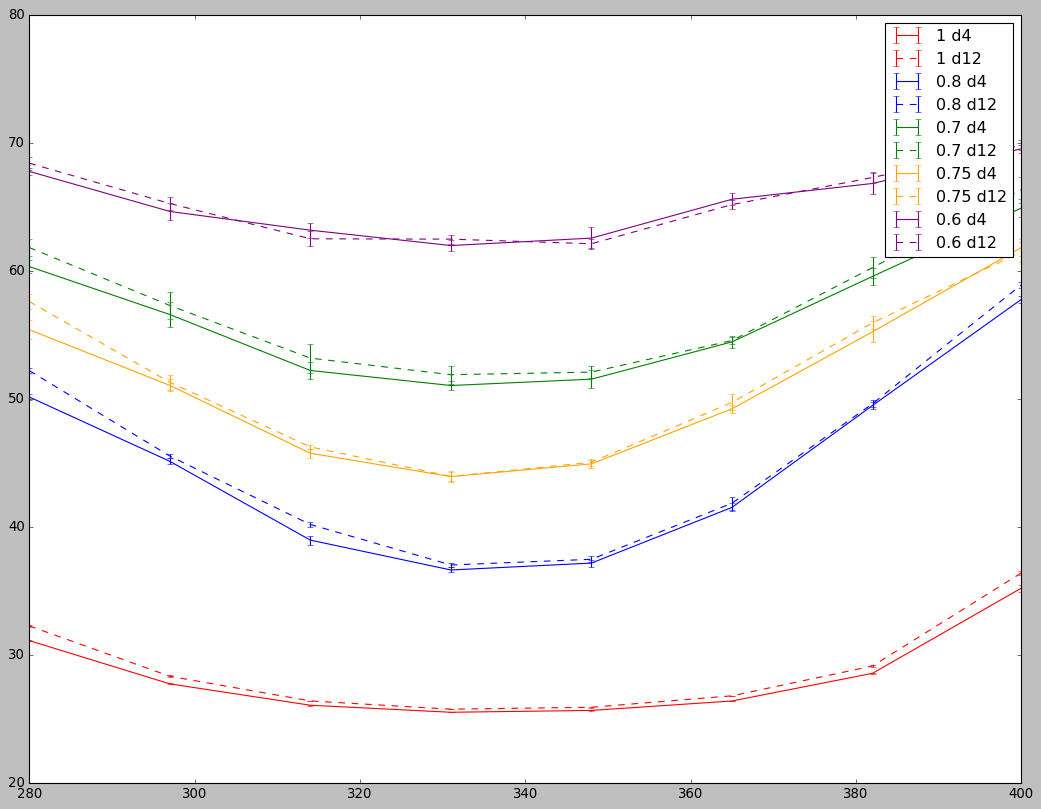

In [11]:
plt.figure(figsize=(16,12))
plt.errorbar(d4_1.temperatures, d4_1.c_rg[0], yerr=d4_1.c_rg[1], label='1 d4', color='red')
plt.errorbar(d12_1.temperatures, d12_1.c_rg[0], yerr=d12_1.c_rg[1], label='1 d12', color='red', ls='--')
plt.errorbar(d4_8.temperatures, d4_8.c_rg[0], yerr=d4_8.c_rg[1], label='0.8 d4', color='blue')
plt.errorbar(d12_8.temperatures, d12_8.c_rg[0], yerr=d12_8.c_rg[1], label='0.8 d12', color='blue', ls='--')
plt.errorbar(d4_7.temperatures, d4_7.c_rg[0], yerr=d4_7.c_rg[1], label='0.7 d4', color='green')
plt.errorbar(d12_7.temperatures, d12_7.c_rg[0], yerr=d12_7.c_rg[1], label='0.7 d12', color='green', ls='--')
plt.errorbar(d4_75.temperatures, d4_75.c_rg[0], yerr=d4_75.c_rg[1], label='0.75 d4', color='orange')
plt.errorbar(d12_75.temperatures, d12_75.c_rg[0], yerr=d12_75.c_rg[1], label='0.75 d12', color='orange', ls='--')
plt.errorbar(d4_6.temperatures, d4_6.c_rg[0], yerr=d4_6.c_rg[1], label='0.6 d4', color='purple')
plt.errorbar(d12_6.temperatures, d12_6.c_rg[0], yerr=d12_6.c_rg[1], label='0.6 d12', color='purple', ls='--')
plt.axhline(d4_1.rw_rg(),'--')
plt.legend()

In [16]:
# 0.75 EPS
wt_075eps = lmp.LMP(md_dir='/home/adria/perdiux/prod/lammps/final/HPS-T/0.75_50/WT', low_mem=True)
wt_075eps.rg()
d4_075eps = lmp.LMP(md_dir='/home/adria/perdiux/prod/lammps/final/HPS-T/0.75_50/D4', low_mem=True)
d4_075eps.rg()
d7_075eps = lmp.LMP(md_dir='/home/adria/perdiux/prod/lammps/final/HPS-T/0.75_50/7D_WT', low_mem=True)
d7_075eps.rg()
d12_075eps = lmp.LMP(md_dir='/home/adria/perdiux/prod/lammps/final/HPS-T/0.75_50/12D_D4', low_mem=True)
d12_075eps.rg()

> Run Completed at 57.07% for CPEB4_alpha. Ran 570660000 steps for a total of 57067 frames 
> Taking frames every None for a total of [72133, 62739, 59343, 57058, 57086, 62501, 72676, 83901] to avoid strong correlations
> Run Completed at 23.64% for CPEB4_D4. Ran 236410000 steps for a total of 23642 frames 
> Taking frames every None for a total of [29415, 26721, 24993, 23364, 24197, 26398, 30086, 35629] to avoid strong correlations
> Run Completed at 53.79% for 7D_CPEB4. Ran 537870000 steps for a total of 53788 frames 
> Taking frames every None for a total of [73452, 68091, 62186, 53619, 55350, 60623, 72164, 87442] to avoid strong correlations
> Run Completed at 15.26% for 12D_CPEB4_D4. Ran 152630000 steps for a total of 15264 frames 
> Taking frames every None for a total of [19340, 17588, 16340, 14981, 15090, 16607, 18812, 21981] to avoid strong correlations


(array([], dtype=float64), array([], dtype=float64))

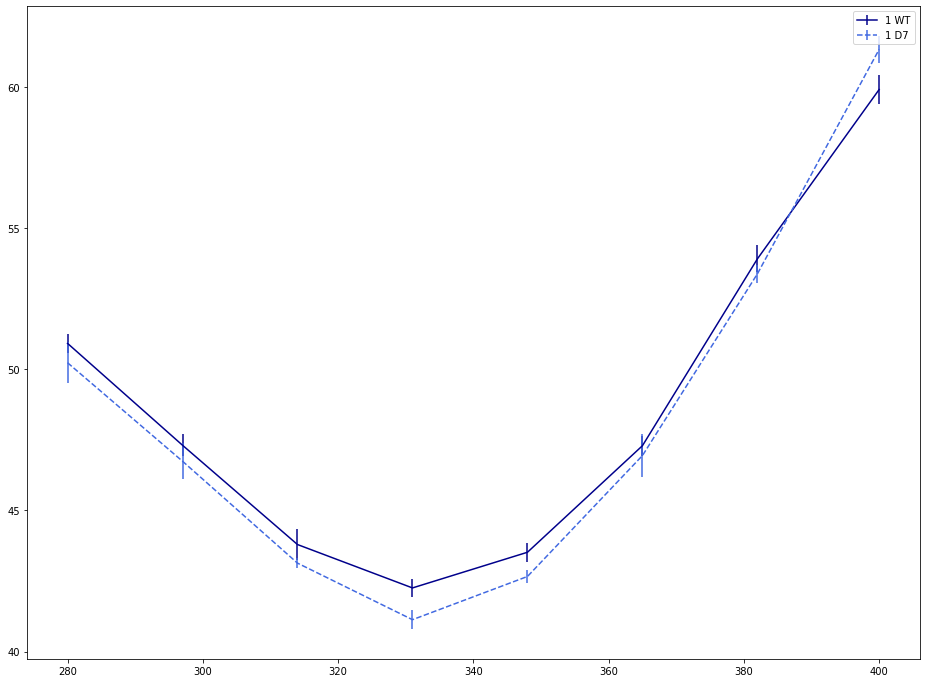

In [17]:
plt.figure(figsize=(16,12))
plt.errorbar(wt_075eps.temperatures, wt_075eps.c_rg[0], yerr=wt_075eps.c_rg[1], label='1 WT', color=WT_COL)
plt.errorbar(d7_075eps.temperatures, d7_075eps.c_rg[0], yerr=d7_075eps.c_rg[1], label='1 D7', color=D7_COL, ls='--')
plt.legend()

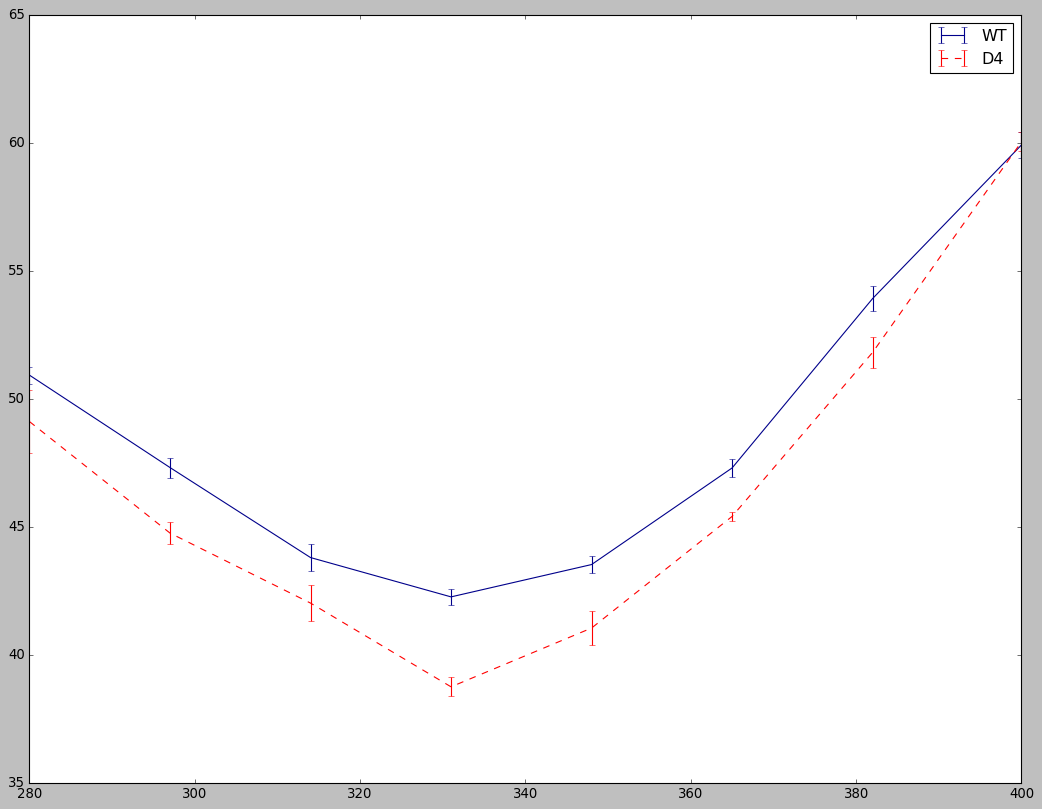

In [21]:
plt.style.use('seaborn-deep')

plt.figure(figsize=(16,12))
plt.errorbar(wt_075eps.temperatures, wt_075eps.c_rg[0], yerr=wt_075eps.c_rg[1], label='WT', color=WT_COL)
plt.errorbar(d4_075eps.temperatures, d4_075eps.c_rg[0], yerr=d4_075eps.c_rg[1], label='D4', color=D4_COL, ls='--')
plt.legend()

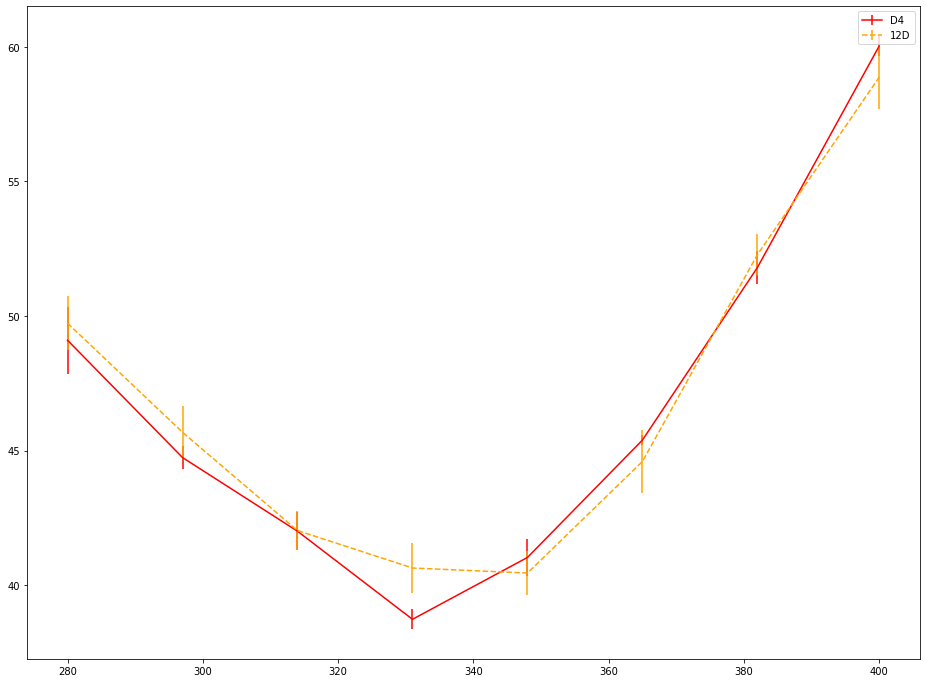

In [19]:
plt.figure(figsize=(16,12))
plt.errorbar(d4_075eps.temperatures, d4_075eps.c_rg[0], yerr=d4_075eps.c_rg[1], label='D4', color=D4_COL)
plt.errorbar(d12_075eps.temperatures, d12_075eps.c_rg[0], yerr=d12_075eps.c_rg[1], label='12D', color=D12_COL, ls='--')
plt.legend()

In [13]:
d4_075eps.rw_rg()

47.099186121772135

In [ ]:
t = t[np.where(t==0.9)]